# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [90]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()
#         print(weather_json)
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = (weather_json["coord"]["lat"])
        city_lng = (weather_json["coord"]["lon"])
        city_max_temp = (weather_json["main"]["temp_max"])
        city_humidity = (weather_json["main"]["humidity"])
        city_clouds = (weather_json["clouds"]["all"])
        city_wind = (weather_json["wind"]["speed"])
        city_country = (weather_json["sys"]["country"])
        city_date = (weather_json["dt"])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nkhotakota
Processing Record 2 of Set 1 | craig
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | havoysund
Processing Record 6 of Set 1 | pavino
Processing Record 7 of Set 1 | zelenoborskiy
Processing Record 8 of Set 1 | elban
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | vilhena
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | victoria
Processing Record 14 of Set 1 | columbus
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | sao filipe
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | paamiut
Processing Record 19 of Set 1 | dunedin
Processing Record 20 of Set 1 | certegui
Processing Record 21 of Set 1 | norman wells
Processing Record 22 of Set 1 | kirando
Processing Record 23 of Set 1 | othonoi
City

City not found. Skipping...
Processing Record 40 of Set 4 | mount isa
Processing Record 41 of Set 4 | pandan
Processing Record 42 of Set 4 | lompoc
Processing Record 43 of Set 4 | kozhva
Processing Record 44 of Set 4 | severo-kurilsk
Processing Record 45 of Set 4 | halifax
Processing Record 46 of Set 4 | arraial do cabo
Processing Record 47 of Set 4 | gunjur
Processing Record 48 of Set 4 | nikolskoye
Processing Record 49 of Set 4 | tatarsk
Processing Record 0 of Set 5 | bathsheba
Processing Record 1 of Set 5 | port elizabeth
Processing Record 2 of Set 5 | balkanabat
Processing Record 3 of Set 5 | provideniya
Processing Record 4 of Set 5 | elat
Processing Record 5 of Set 5 | vaitape
Processing Record 6 of Set 5 | pueblo
Processing Record 7 of Set 5 | zhigansk
Processing Record 8 of Set 5 | pontes e lacerda
Processing Record 9 of Set 5 | codrington
Processing Record 10 of Set 5 | kununurra
Processing Record 11 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 o

Processing Record 27 of Set 8 | yueyang
Processing Record 28 of Set 8 | terney
Processing Record 29 of Set 8 | hofn
Processing Record 30 of Set 8 | khudumelapye
Processing Record 31 of Set 8 | davidson
Processing Record 32 of Set 8 | nago
Processing Record 33 of Set 8 | arlit
Processing Record 34 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 35 of Set 8 | senneterre
Processing Record 36 of Set 8 | kanniyakumari
Processing Record 37 of Set 8 | quelimane
Processing Record 38 of Set 8 | tura
Processing Record 39 of Set 8 | labuhan
Processing Record 40 of Set 8 | san quintin
Processing Record 41 of Set 8 | ust-dzheguta
Processing Record 42 of Set 8 | port augusta
Processing Record 43 of Set 8 | basco
Processing Record 44 of Set 8 | synya
Processing Record 45 of Set 8 | rolim de moura
City not found. Skipping...
Processing Record 46 of Set 8 | conceicao do araguaia
Processing Record 47 of Set 8 | altonia
City not found. Skipping...
Processing Record 48 of Set 8 | vaitupu

Processing Record 11 of Set 12 | liverpool
Processing Record 12 of Set 12 | kieta
Processing Record 13 of Set 12 | tenkodogo
Processing Record 14 of Set 12 | nowa deba
Processing Record 15 of Set 12 | san vicente
Processing Record 16 of Set 12 | kralendijk
Processing Record 17 of Set 12 | rundu
Processing Record 18 of Set 12 | inuvik
Processing Record 19 of Set 12 | gumdag
Processing Record 20 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 21 of Set 12 | coos bay
Processing Record 22 of Set 12 | yar-sale
Processing Record 23 of Set 12 | bilecik
Processing Record 24 of Set 12 | peace river
Processing Record 25 of Set 12 | ewa beach
Processing Record 26 of Set 12 | tarakan
Processing Record 27 of Set 12 | lafiagi
Processing Record 28 of Set 12 | la libertad
Processing Record 29 of Set 12 | nakusp
Processing Record 30 of Set 12 | skjervoy
Processing Record 31 of Set 12 | kysyl-syr
Processing Record 32 of Set 12 | muros
Processing Record 33 of Set 12 | changzhou
Pr

In [91]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [92]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nkhotakota,-12.9274,34.2961,22.46,87,100,2.69,MW,1673060609
1,craig,40.5153,-107.5464,-0.03,86,100,6.17,US,1673060610
2,albany,42.6001,-73.9662,3.00,87,57,1.79,US,1673060611
3,hilo,19.7297,-155.0900,29.04,92,7,0.89,US,1673060611
4,havoysund,70.9963,24.6622,-0.87,80,51,10.98,NO,1673060612


In [93]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [94]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nkhotakota,-12.9274,34.2961,22.46,87,100,2.69,MW,1673060609
1,craig,40.5153,-107.5464,-0.03,86,100,6.17,US,1673060610
2,albany,42.6001,-73.9662,3.00,87,57,1.79,US,1673060611
3,hilo,19.7297,-155.0900,29.04,92,7,0.89,US,1673060611
4,havoysund,70.9963,24.6622,-0.87,80,51,10.98,NO,1673060612


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

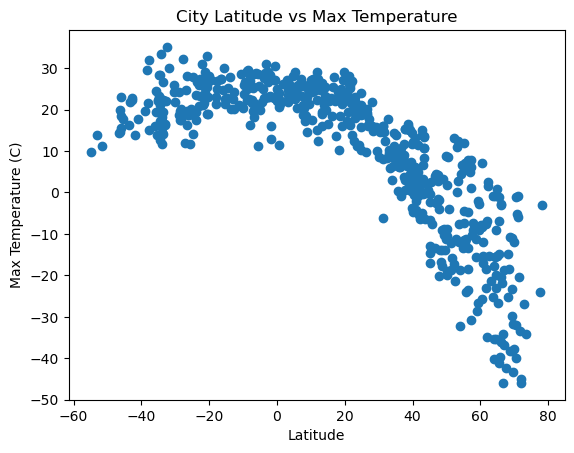

In [95]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values,)
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)") #convert to celcius

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

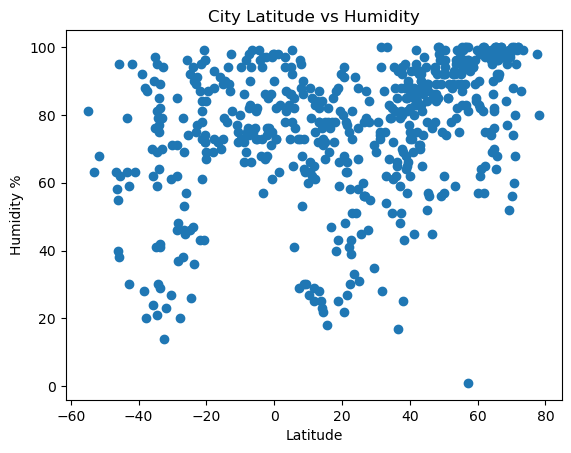

In [96]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values,)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

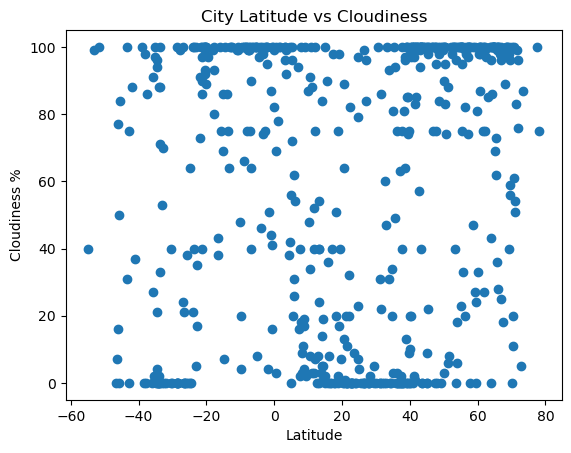

In [97]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values,)
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

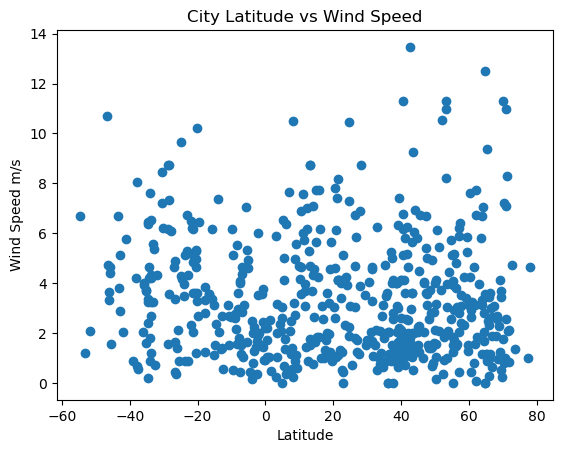

In [98]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values,)
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed m/s")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [99]:
# Define a function to create Linear Regression plots

In [100]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,craig,40.5153,-107.5464,-0.03,86,100,6.17,US,1673060610
2,albany,42.6001,-73.9662,3.00,87,57,1.79,US,1673060611
3,hilo,19.7297,-155.0900,29.04,92,7,0.89,US,1673060611
4,havoysund,70.9963,24.6622,-0.87,80,51,10.98,NO,1673060612
5,pavino,59.1139,46.1414,-28.57,96,27,3.42,RU,1673060612


In [101]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nkhotakota,-12.9274,34.2961,22.46,87,100,2.69,MW,1673060609
9,vilhena,-12.7406,-60.1458,20.11,98,100,1.40,BR,1673060615
11,punta arenas,-53.1500,-70.9167,13.95,63,99,1.20,CL,1673060616
14,busselton,-33.6500,115.3333,22.35,42,71,2.68,AU,1673060422
16,hithadhoo,-0.6000,73.0833,27.05,75,16,3.77,MV,1673060618


###  Temperature vs. Latitude Linear Regression Plot

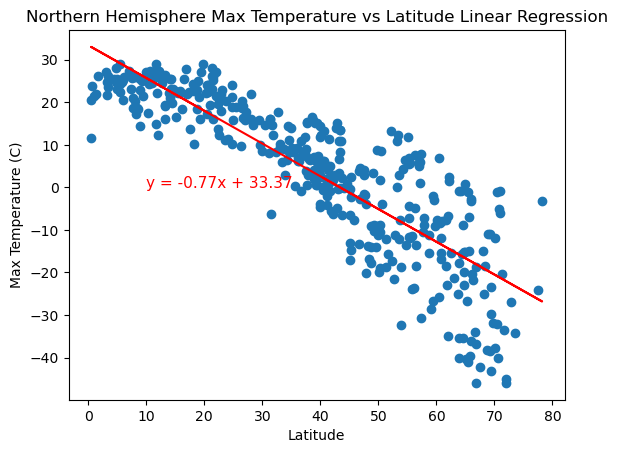

The r value is:  -0.8587299214375644


In [103]:
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
# defining the values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
text_coordinates = (10, 0)

# Calculating the regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# # Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, text_coordinates, fontsize=11, color="r")
plt.title("Northern Hemisphere Max Temperature vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)") #convert to celcius

# Show plot
plt.show()
print("The r value is: ", rvalue)

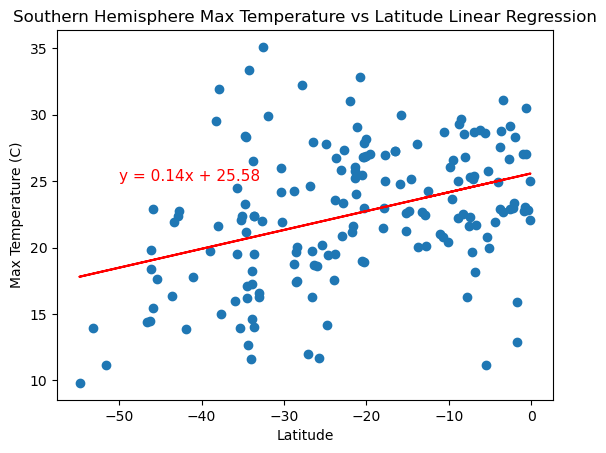

The r value is:  0.3792095528992827


In [106]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. temperature
# Define the values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
text_coordinates = (-50, 25)

# Calculating the regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, text_coordinates, fontsize=11, color="r")
plt.title("Southern Hemisphere Max Temperature vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)") #convert to celcius

# Show plot
plt.show()
print("The r value is: ", rvalue)

**Discussion about the linear relationship:** The linear regression shows that the closer a city is sitting to the equator/latitude 0 the warmer the city will be.

### Humidity vs. Latitude Linear Regression Plot

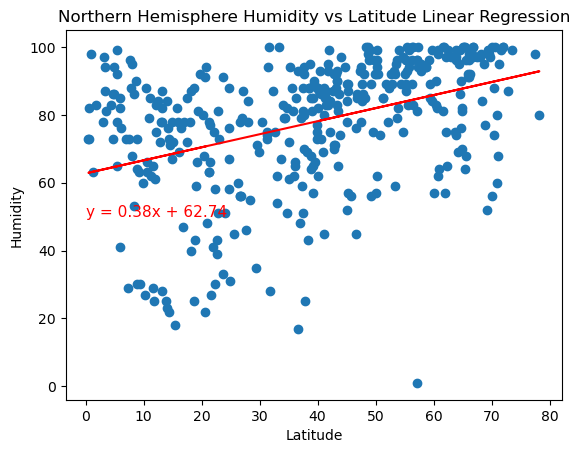

The r value is:  0.4033489532067441


In [107]:
# Northern Hemisphere
# Define the values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
text_coordinates = (0, 50)

# Calculating the regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, text_coordinates, fontsize=11, color="r")
plt.title("Northern Hemisphere Humidity vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity") 

# Show plot
plt.show()
print("The r value is: ", rvalue)

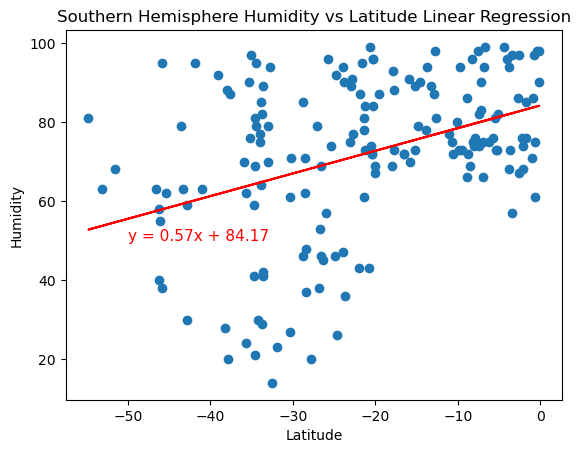

The r value is:  0.38872217907462636


In [109]:
# Southern Hemisphere
# Define the values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
text_coordinates = (-50, 50)

# Calculating the regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, text_coordinates, fontsize=11, color="r")
plt.title("Southern Hemisphere Humidity vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity") 

# Show plot
plt.show()
print("The r value is: ", rvalue)

**Discussion about the linear relationship:** The linear regression shows the higher the latitude, the higher the humidity will be.

### Cloudiness vs. Latitude Linear Regression Plot

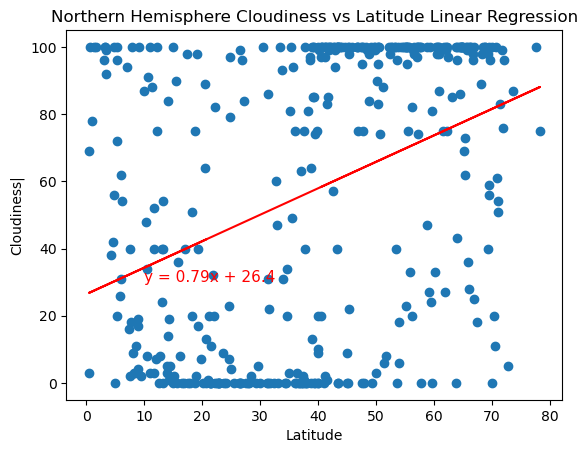

The r value is:  0.3758801818911953


In [111]:
# Northern Hemisphere
# Define the values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
text_coordinates = (10, 30)

# Calculating the regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, text_coordinates, fontsize=11, color="r")
plt.title("Northern Hemisphere Cloudiness vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness|") 

# Show plot
plt.show()
print("The r value is: ", rvalue)

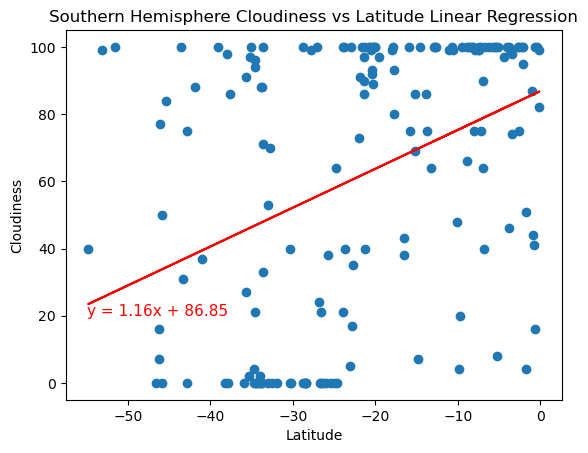

The r value is:  0.3913031954920736


In [112]:
# Southern Hemisphere
# Define the values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
text_coordinates = (-55, 20)

# Calculating the regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, text_coordinates, fontsize=11, color="r")
plt.title("Southern Hemisphere Cloudiness vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness") 

# Show plot
plt.show()
print("The r value is: ", rvalue)

**Discussion about the linear relationship:** The linear regression shows that the higher the latitude, the cloudier the sky will be.

### Wind Speed vs. Latitude Linear Regression Plot

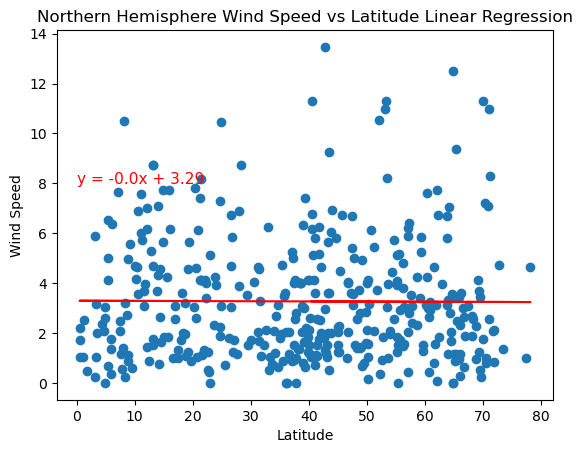

The r value is:  -0.005598529546213601


In [113]:
# Northern Hemisphere
# Define the values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
text_coordinates = (0, 8)

# Calculating the regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, text_coordinates, fontsize=11, color="r")
plt.title("Northern Hemisphere Wind Speed vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed") 

# Show plot
plt.show()
print("The r value is: ", rvalue)

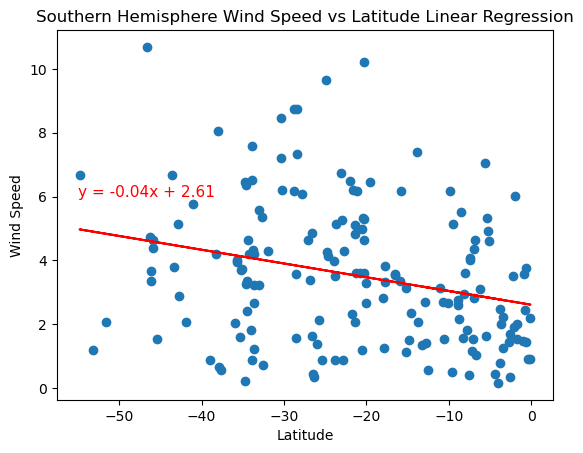

The r value is:  -0.26782218253766643


In [115]:
# Southern Hemisphere
# Define the values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
text_coordinates = (-55, 6)

# Calculating the regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, text_coordinates, fontsize=11, color="r")
plt.title("Southern Hemisphere Wind Speed vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed") 

# Show plot
plt.show()
print("The r value is: ", rvalue)

**Discussion about the linear relationship:** The linear regression shows that the northern hemisphere doesn't really have a change in wind speed whether you are near or far from the equator/latitude 0, however, in the southern hemisphere, the south a city sits, the higher their windspeed will be.